## Observations and Insights 

From the 249 studied mice, 49% were female and 51% male. 
There were 10 drug regimens used and the highest timepoints were for the Capomulin, 4,960, and Ramicane, 4,885. 
When selecting one mouse to analyse the effect of the Capomulin regimen, the tumor volume shows a steady decrease in time. Regarding the Capomulin studies, there is a positive relationship between average tumor volume and mouse weight. The r-squared factor shows strong, positive association between the two factors.

In [1]:
%matplotlib inline


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
metadata_study_ds=pd.merge(mouse_metadata,study_results, how="inner", on=["Mouse ID"] )


# Display the data table for preview
metadata_study_ds

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.

mice_nr = len(metadata_study_ds["Mouse ID"].unique())
mice_nr 

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicated_mouse_ID=metadata_study_ds[metadata_study_ds.duplicated(["Mouse ID", "Timepoint"])]
duplicated_mouse_ID


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_g989=metadata_study_ds.loc[metadata_study_ds["Mouse ID"]=="g989"]
mouse_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_df=metadata_study_ds.drop_duplicates(subset=["Mouse ID","Timepoint"],keep=False)

Clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
Clean_df_mice_count = len(Clean_df["Mouse ID"].unique())
Clean_df_mice_count

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# create a dataframe grouped by drug regimen
drug_regim_df = Clean_df.groupby("Drug Regimen")

# calculate summary statistics of the tumor volume
tumor_mean =drug_regim_df["Tumor Volume (mm3)"].mean()
tumor_median =drug_regim_df["Tumor Volume (mm3)"].median()
tumor_variance =drug_regim_df["Tumor Volume (mm3)"].var()
tumor_std =drug_regim_df["Tumor Volume (mm3)"].std()
tumor_sem =drug_regim_df["Tumor Volume (mm3)"].sem()

# create a summary table to present the calculated values by drug regime

summary_drug_tumor_df=pd.DataFrame({"Mean":tumor_mean,
                                   "Median":tumor_median,
                                   "Variation":tumor_variance,
                                   "Standard Deviation":tumor_std,
                                   "SEM":tumor_sem})
summary_drug_tumor_df.head()




,Mean,Median,Variation,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

aggr_df = drug_regim_df.agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
aggr_df.head()



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [10]:
Clean_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1883.00000,1883.000000,1883.000000,1883.000000,1883.000000
mean,12.77111,25.660648,19.622942,50.449310,1.025491
std,7.18380,3.931950,14.090045,8.914637,1.139284
min,1.00000,15.000000,0.000000,22.050126,0.000000
25%,7.00000,25.000000,5.000000,45.000000,0.000000
50%,13.00000,27.000000,20.000000,48.951368,1.000000
75%,20.00000,29.000000,30.000000,56.346321,2.000000
max,24.00000,30.000000,45.000000,78.567014,4.000000


## Bar and Pie Charts

Text(50.875, 0.5, 'Timepoint Mouse ID Count')

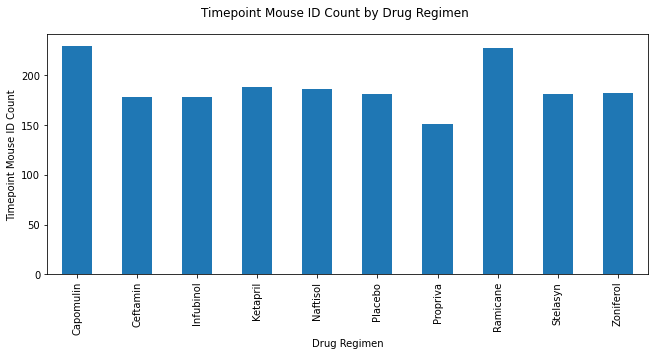

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

chart_df = metadata_study_ds.drop_duplicates(subset=["Mouse ID","Timepoint"],keep=False)

timepoint_count = chart_df.groupby(['Drug Regimen'])['Timepoint'].count() 

timepoint_count.plot(kind="bar", figsize=(9,5))
plt.suptitle("Timepoint Mouse ID Count by Drug Regimen")
plt.tight_layout()
plt.ylabel('Timepoint Mouse ID Count')


<function matplotlib.pyplot.savefig(*args, **kwargs)>

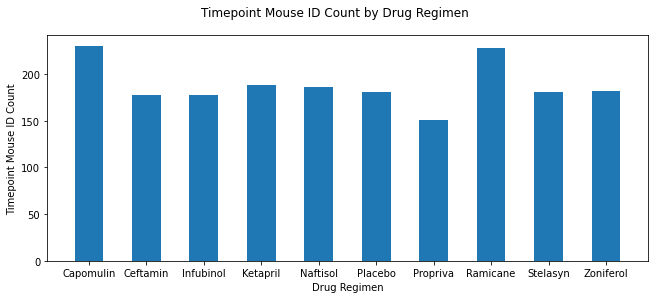

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
 
drug_regimen=(chart_df.groupby(["Drug Regimen"])["Drug Regimen"].count()).tolist()
x=np.arange(len(drug_regimen))

plt.figure(figsize=(9,4))


plt.bar(x, drug_regimen, width = 0.5, align="center")

plt.suptitle("Timepoint Mouse ID Count by Drug Regimen")

plt.tight_layout()
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoint Mouse ID Count')

values=["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]

plt.xticks(x,values)
plt.savefig

<AxesSubplot:title={'center':'Female Versus Male Mice Distribution'}, ylabel='Mouse ID'>

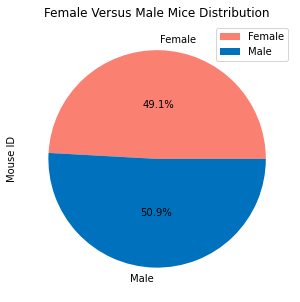

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

pie_df=metadata_study_ds.drop_duplicates(subset=["Mouse ID","Timepoint"],keep=False)

pie_df=pie_df[["Mouse ID","Sex"]]

pie_df.head()

pie_df.groupby(["Sex"]).count().plot(kind="pie",y="Mouse ID", colors=['salmon','#0072BD'], autopct='%1.1f%%' ,pctdistance=0.5, figsize=(5, 5),title=("Female Versus Male Mice Distribution"))


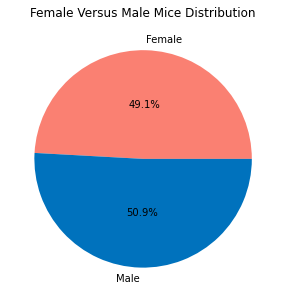

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mouse_sex_count=Clean_df.groupby(["Sex"])["Age_months"].count().tolist()

x = mouse_sex_count
plt.figure(figsize=(5,5))

labels=["Female","Male"]
colors=['salmon','#0072BD']
plt.pie(x, labels=labels, colors=colors, autopct='%1.1f%%',pctdistance=0.5)
plt.figsize=(6, 6)
plt.title("Female Versus Male Mice Distribution")

plt.show()


#matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, data=None)


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

q_df=metadata_study_ds.drop_duplicates(subset=["Mouse ID","Timepoint"],keep=False)

q_df.head()

    # create a combined CSV file 

compression_opts = dict(method='zip',
                        archive_name='out.csv')  
q_df.to_csv('out.zip', index=False,
          compression=compression_opts)  
    #read the new csv file
combined_df = pd.read_csv('out.zip')
combined_df.head()
   
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = pd.DataFrame(combined_df.groupby("Mouse ID")["Timepoint"].max())
last_timepoint_df.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
selected_drug_df=combined_df[combined_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

selected_drug_df=selected_drug_df[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
selected_drug_df.head()

last=pd.merge(last_timepoint_df,selected_drug_df, how="inner", on=["Mouse ID", "Timepoint" ] )
last.head()

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a275,45,Ceftamin,62.999356
3,a411,45,Ramicane,38.407618
4,a444,45,Ramicane,43.047543


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
combined_df.head()

treatments= combined_df["Drug Regimen"].unique()
treatments
treatment_list=['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds 
# calculated for the four regimens of interest and for all drug regimens togheter




In [17]:
# Capomulin Drug Regimen
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# tumor volumes
# upper, lower bounds and outliers 

Capomulin_df=combined_df.loc[combined_df["Drug Regimen"]=='Capomulin']
Capomulin_tumor_volumes=Capomulin_df["Tumor Volume (mm3)"]


Capomulin_quartiles = Capomulin_tumor_volumes.quantile([.25,.5,.75])
Capomulin_lowerq = Capomulin_quartiles[0.25]
Capomulin_upperq = Capomulin_quartiles[0.75]
Capomulin_iqr = Capomulin_upperq-Capomulin_lowerq

print(f"The lower quartile of tumor volume for Capomulin drug regimen is: {Capomulin_lowerq}")
print(f"The upper quartile of tumor volume for Capomulin drug regimen is: {Capomulin_upperq}")
print(f"The interquartile range of tumor volume for Capomulin drug regimen is: {Capomulin_iqr}")
print(f"The the median of tumor volume for Capomulin drug regimen is: {Capomulin_quartiles[0.5]} ")

Capomulin_lower_bound = Capomulin_lowerq - (1.5*Capomulin_iqr)
Capomulin_upper_bound = Capomulin_upperq + (1.5*Capomulin_iqr)
print(f"Values below {Capomulin_lower_bound} could be outliers.")
print(f"Values above {Capomulin_upper_bound} could be outliers.")

The lower quartile of tumor volume for Capomulin drug regimen is: 37.685932865
The upper quartile of tumor volume for Capomulin drug regimen is: 45.0
The interquartile range of tumor volume for Capomulin drug regimen is: 7.314067135000002
The the median of tumor volume for Capomulin drug regimen is: 41.557808879999996 
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.


In [18]:
# Ramicane Drug Regimen
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# tumor volumes
# upper, lower bounds and outliers 

Ramicane_df=combined_df.loc[combined_df["Drug Regimen"]=='Ramicane']
Ramicane_tumor_volumes=Ramicane_df["Tumor Volume (mm3)"]  

Ramicane_quartiles = Ramicane_tumor_volumes.quantile([.25,.5,.75])
Ramicane_lowerq = Ramicane_quartiles[0.25]
Ramicane_upperq = Ramicane_quartiles[0.75]
Ramicane_iqr = Ramicane_upperq-Ramicane_lowerq

print(f"The lower quartile of tumor volume for Ramicane drug regimen is: {Ramicane_lowerq}")
print(f"The upper quartile of tumor volume for Ramicane drug regimen is: {Ramicane_upperq}")
print(f"The interquartile range of tumor volume for Ramicane drug regimen is: {Ramicane_iqr}")
print(f"The the median of tumor volume for Ramicane drug regimen is: {Ramicane_quartiles[0.5]} ")

Ramicane_lower_bound = Ramicane_lowerq - (1.5*Ramicane_iqr)
Ramicane_upper_bound = Ramicane_upperq + (1.5*Ramicane_iqr)
print(f"Values below {Ramicane_lower_bound} could be outliers.")
print(f"Values above {Ramicane_upper_bound} could be outliers.")


The lower quartile of tumor volume for Ramicane drug regimen is: 36.674634585
The upper quartile of tumor volume for Ramicane drug regimen is: 45.0
The interquartile range of tumor volume for Ramicane drug regimen is: 8.325365415
The the median of tumor volume for Ramicane drug regimen is: 40.67323554 
Values below 24.1865864625 could be outliers.
Values above 57.488048122500004 could be outliers.


In [19]:
# Infubinol Drug Regimen
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# tumor volumes
# upper, lower bounds and outliers 

Infubinol_df=combined_df.loc[combined_df["Drug Regimen"]=='Infubinol']
Infubinol_tumor_volumes=Infubinol_df["Tumor Volume (mm3)"]  

Infubinol_quartiles = Infubinol_tumor_volumes.quantile([.25,.5,.75])
Infubinol_lowerq = Infubinol_quartiles[0.25]
Infubinol_upperq = Infubinol_quartiles[0.75]
Infubinol_iqr = Infubinol_upperq-Infubinol_lowerq

print(f"The lower quartile of tumor volume for Infubinol drug regimen is: {Infubinol_lowerq}")
print(f"The upper quartile of tumor volume for Infubinol drug regimen is: {Infubinol_upperq}")
print(f"The interquartile range of tumor volume for Infubinol drug regimen is: {Infubinol_iqr}")
print(f"The the median of tumor volume for Infubinol drug regimen is: {Infubinol_quartiles[0.5]} ")

Infubinol_lower_bound = Infubinol_lowerq - (1.5*Infubinol_iqr)
Infubinol_upper_bound = Infubinol_upperq + (1.5*Infubinol_iqr)
print(f"Values below {Infubinol_lower_bound} could be outliers.")
print(f"Values above {Infubinol_upper_bound} could be outliers.")


The lower quartile of tumor volume for Infubinol drug regimen is: 47.3123533
The upper quartile of tumor volume for Infubinol drug regimen is: 57.314443967500004
The interquartile range of tumor volume for Infubinol drug regimen is: 10.002090667500006
The the median of tumor volume for Infubinol drug regimen is: 51.82058438 
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.


In [20]:
# Ceftamin Drug Regimen
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# tumor volumes
# upper, lower bounds and outliers 

Ceftamin_df=combined_df.loc[combined_df["Drug Regimen"]=='Ceftamin']
Ceftamin_tumor_volumes=Ceftamin_df["Tumor Volume (mm3)"]  

Ceftamin_quartiles = Ceftamin_tumor_volumes.quantile([.25,.5,.75])
Ceftamin_lowerq = Ceftamin_quartiles[0.25]
Ceftamin_upperq = Ceftamin_quartiles[0.75]
Ceftamin_iqr = Ceftamin_upperq-Ceftamin_lowerq

print(f"The lower quartile of tumor volume for Ceftamin drug regimen is: {Ceftamin_lowerq}")
print(f"The upper quartile of tumor volume for Ceftamin drug regimen is: {Ceftamin_upperq}")
print(f"The interquartile range of tumor volume for Ceftamin drug regimen is: {Ceftamin_iqr}")
print(f"The the median of tumor volume for Ceftamin drug regimen is: {Ceftamin_quartiles[0.5]} ")

Ceftamin_lower_bound = Ceftamin_lowerq - (1.5*Ceftamin_iqr)
Ceftamin_upper_bound = Ceftamin_upperq + (1.5*Ceftamin_iqr)
print(f"Values below {Ceftamin_lower_bound} could be outliers.")
print(f"Values above {Ceftamin_upper_bound} could be outliers.")


The lower quartile of tumor volume for Ceftamin drug regimen is: 47.2084271125
The upper quartile of tumor volume for Ceftamin drug regimen is: 56.801437570000004
The interquartile range of tumor volume for Ceftamin drug regimen is: 9.593010457500007
The the median of tumor volume for Ceftamin drug regimen is: 51.77615728 
Values below 32.81891142624998 could be outliers.
Values above 71.19095325625001 could be outliers.


In [21]:
# All Drug Regimens
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# tumor volumes
# upper, lower bounds and outliers 

last.head()

tumor_volumes= combined_df["Tumor Volume (mm3)"]   
tumor_volumes  


quartiles = tumor_volumes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 45.0
The upper quartile of tumor volume is: 56.34632118
The interquartile range of tumor volume is: 11.346321179999997
The the median of tumor volume is: 48.95136773 
Values below 27.980518230000005 could be outliers.
Values above 73.36580294999999 could be outliers.


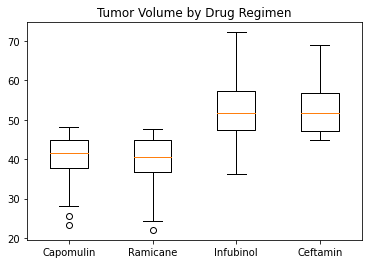

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data_to_plot = [Capomulin_tumor_volumes,
                Ramicane_tumor_volumes,
                Infubinol_tumor_volumes,
                Ceftamin_tumor_volumes]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Drug Regimen')
ax1.boxplot(data_to_plot)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()


## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume vs. Timepoint for Mouse Treated with Capomulin')

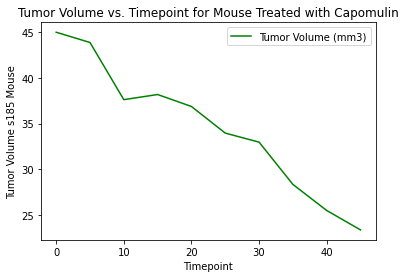

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_mice=combined_df.loc[combined_df["Drug Regimen"]=='Capomulin']

Capomulin_mouse_s185=Capomulin_mice.loc[Capomulin_mice["Mouse ID"]=="s185"]
Capomulin_mouse_s185

Capomulin_mouse_s185_df = Capomulin_mouse_s185[['Tumor Volume (mm3)','Timepoint']]
Capomulin_mouse_s185_df

Capomulin_mouse_s185_df.plot(x="Timepoint", y=["Tumor Volume (mm3)"], kind="line", color="green")
plt.ylabel('Tumor Volume s185 Mouse') 
plt.title('Tumor Volume vs. Timepoint for Mouse Treated with Capomulin') 


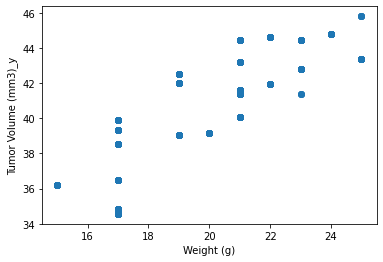

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

Capomulin_mice.head()

Capomulin_scatter_data=Capomulin_mice[["Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]]
Capomulin_scatter_data.head()

average_tumor_df = pd.DataFrame(Capomulin_scatter_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index()
Capomulin_df = pd.merge(Capomulin_scatter_data, average_tumor_df, on='Mouse ID')

Capomulin_df

plt.scatter(Capomulin_df["Weight (g)"],Capomulin_df["Tumor Volume (mm3)_y"])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)_y')
plt.show()




## Correlation and Regression

The correlation between both factors is 0.83
The r-squared is: 0.6962164535925288


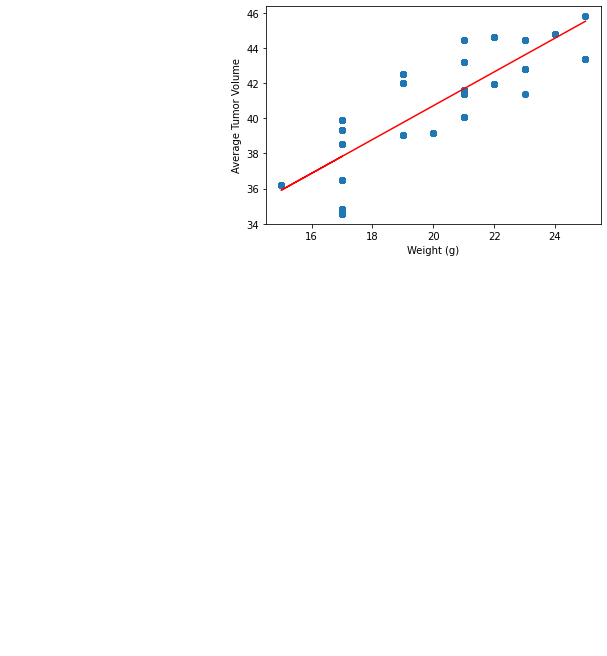

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Average tumor column Tumor Volume (mm3)_y
# mouse weight column Weight (g)

Capomulin_df.head()

mouse_weight = Capomulin_df.iloc[:,2]
average_tumor = Capomulin_df.iloc[:,3]
correlation = st.pearsonr(mouse_weight,average_tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# plot mouse weight versus average tumor volume, calculate linear regressian and add to plot, print r-squared value 
x_values = Capomulin_df['Weight (g)']
y_values = Capomulin_df['Tumor Volume (mm3)_y']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
print(f"The r-squared is: {rvalue**2}")
plt.show()